The first thing I did was visit the [bike sharing demand](https://www.kaggle.com/c/bike-sharing-demand/data) Kaggle competition, navigate to 'Data' and click 'Download All'. This got me a ZIP file, which I unzipped, and added the three files within (sampleSubmission.csv, train.csv, test.csv) to this notebook. I'll assume this was done before running any of the code below.

In [ ]:
# directly from the fastai notebook, just about display stuff
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [ ]:
train_df = pd.read_csv('train.csv')
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
# nothing is missing! awesome
train_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
train_df.describe(include=(np.number))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: >

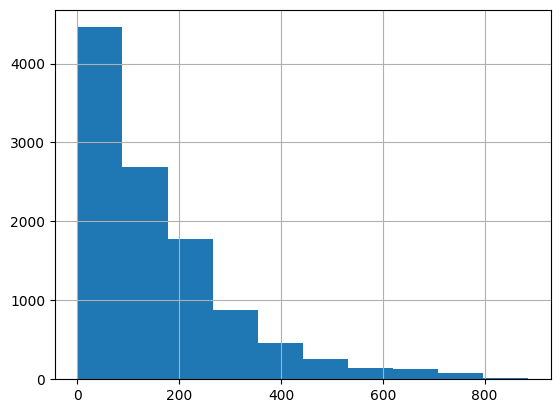

In [ ]:
# atemp, humidity, windspeed, temp need to be adjusted
# will probably throw out datetime for this use too
train_df['registered'].hist()

In [ ]:
train_df = pd.get_dummies(train_df, columns=["holiday","workingday"])

In [ ]:
train_df.columns

Index(['datetime', 'season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1'],
      dtype='object')

In [ ]:
# coerce these into integers - only need one because boolean
train_df = train_df.astype({'holiday_0': 'int',  'workingday_0': 'int'})
added_cols = ['holiday_0', 'workingday_0']

In [ ]:
train_df['log_humidity'] = np.log(train_df['humidity']+1)
train_df['log_windspeed'] = np.log(train_df['windspeed']+1)
train_df['log_temp'] = np.log(train_df['temp']+1)
train_df['log_atemp'] = np.log(train_df['atemp']+1)
train_df.columns

Index(['datetime', 'season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'holiday_0',
       'holiday_1', 'workingday_0', 'workingday_1', 'log_humidity', 'log_windspeed', 'log_temp', 'log_atemp'],
      dtype='object')

In [ ]:
indep_cols = ['season', 'weather', 'log_humidity', 'log_windspeed', 'log_temp', 'log_atemp'] + added_cols

<Axes: >

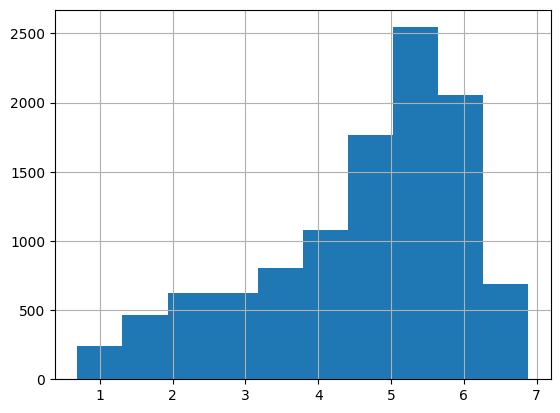

In [ ]:
train_df['log_count'] = np.log(train_df['count']+1)
train_df['log_count'].hist()

In [ ]:
from torch import tensor

t_dep = tensor(train_df['log_count'])

In [ ]:
train_df.describe(include=[object])
train_df[indep_cols].head()

,season,weather,log_humidity,log_windspeed,log_temp,log_atemp,holiday_0,workingday_0
0,1,1,4.406719,0.0,2.383243,2.734043,1,1
1,1,1,4.394449,0.0,2.304583,2.683416,1,1
2,1,1,4.394449,0.0,2.304583,2.683416,1,1
3,1,1,4.330733,0.0,2.383243,2.734043,1,1
4,1,1,4.330733,0.0,2.383243,2.734043,1,1


In [ ]:
t_indep = tensor(train_df[indep_cols].values, dtype=torch.float)

In [ ]:
t_indep.shape

torch.Size([10886, 8])

In [ ]:
# linear model time
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136])

In [ ]:
# better normalization
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [ ]:
# predictions of linear model
preds = (t_indep*coeffs).sum(axis=1)

In [ ]:
preds, t_dep

(tensor([3.1280, 3.1146, 3.1146, 3.1131, 3.1131, 3.3024, 3.1146,  ..., 2.7533, 2.7423, 2.7462, 2.7317, 2.7333, 2.6987, 2.7233]),
 tensor([2.8332, 3.7136, 3.4965, 2.6391, 0.6931, 0.6931, 1.0986,  ..., 6.3333, 6.3456, 5.8201, 5.4889, 5.1299, 4.8675, 4.4886],
        dtype=torch.float64))

In [ ]:
preds[:10]

tensor([3.1280, 3.1146, 3.1146, 3.1131, 3.1131, 3.3024, 3.1146, 3.1168, 3.1131, 3.1533])

In [ ]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(1.9655, dtype=torch.float64)

In [ ]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [ ]:
coeffs.requires_grad_()

tensor([0.0134, 0.4011, 0.9035, 0.2025, 0.3349, 0.2986, 1.2110, 0.5244], requires_grad=True)

In [ ]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(1.9655, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()

In [ ]:
coeffs.grad

tensor([-0.4370, -0.2331, -0.5864, -0.4033, -0.5551, -0.5670, -0.6527, -0.2129])

In [ ]:
# gradients keep getting added
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-1.7478, -0.9325, -2.3458, -1.6131, -2.2203, -2.2680, -2.6107, -0.8517])

In [ ]:
# one gradient descent step
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(1.2576, dtype=torch.float64)


In [ ]:
# create validation set
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(train_df)

In [ ]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(8709, 2177)

In [ ]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [ ]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [ ]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [ ]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [ ]:
coeffs = train_model(18, lr=0.2)

4.645; 3.851; 3.098; 2.451; 1.972; 1.625; 1.395; 1.261; 1.188; 1.151; 1.134; 1.127; 1.123; 1.121; 1.118; 1.116; 1.114; 1.112; 

In [ ]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'season': tensor(0.3791),
 'weather': tensor(0.5114),
 'log_humidity': tensor(1.2856),
 'log_windspeed': tensor(0.5373),
 'log_temp': tensor(0.8205),
 'log_atemp': tensor(0.7865),
 'holiday_0': tensor(1.6858),
 'workingday_0': tensor(0.5319)}

In [ ]:
preds = calc_preds(coeffs, val_indep)

In [ ]:
results = val_dep-preds
results.mean(),results.std()

(tensor(-0.3643, dtype=torch.float64), tensor(1.4935, dtype=torch.float64))

In [ ]:
def acc(coeffs): return (val_dep-(calc_preds(coeffs, val_indep))).abs().mean()
acc(coeffs)

tensor(3.6398, dtype=torch.float64)

In [ ]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [ ]:
coeffs = train_model(lr=0.2)

4.107; 4.058; 4.011; 3.966; 3.924; 3.888; 3.857; 3.830; 3.806; 3.786; 3.769; 3.754; 3.742; 3.731; 3.721; 3.713; 3.705; 3.699; 3.693; 3.687; 3.683; 3.678; 3.674; 3.671; 3.668; 3.665; 3.662; 3.659; 3.657; 3.655; 

In [ ]:
# same!
acc(coeffs)

tensor(3.6398, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [ ]:
show_coeffs()

{'season': tensor(0.0126),
 'weather': tensor(0.3988),
 'log_humidity': tensor(0.8985),
 'log_windspeed': tensor(0.1990),
 'log_temp': tensor(0.3320),
 'log_atemp': tensor(0.2955),
 'holiday_0': tensor(1.2054),
 'workingday_0': tensor(0.5238)}

In [ ]:
# process tst_df
tst_df = pd.read_csv('test.csv')
tst_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [ ]:
tst_df = pd.get_dummies(tst_df, columns=["holiday","workingday"])
tst_df

,datetime,season,weather,temp,atemp,humidity,windspeed,holiday_0,holiday_1,workingday_0,workingday_1
0,2011-01-20 00:00:00,1,1,10.66,11.365,56,26.0027,True,False,False,True
1,2011-01-20 01:00:00,1,1,10.66,13.635,56,0.0000,True,False,False,True
2,2011-01-20 02:00:00,1,1,10.66,13.635,56,0.0000,True,False,False,True
3,2011-01-20 03:00:00,1,1,10.66,12.880,56,11.0014,True,False,False,True
4,2011-01-20 04:00:00,1,1,10.66,12.880,56,11.0014,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,2,10.66,12.880,60,11.0014,True,False,False,True
6489,2012-12-31 20:00:00,1,2,10.66,12.880,60,11.0014,True,False,False,True
6490,2012-12-31 21:00:00,1,1,10.66,12.880,60,11.0014,True,False,False,True
6491,2012-12-31 22:00:00,1,1,10.66,13.635,56,8.9981,True,False,False,True


In [ ]:
tst_df = tst_df.astype({'holiday_0': 'int',  'workingday_0': 'int'})
added_cols = ['holiday_0', 'workingday_0']
tst_df['log_humidity'] = np.log(tst_df['humidity']+1)
tst_df['log_windspeed'] = np.log(tst_df['windspeed']+1)
tst_df['log_temp'] = np.log(tst_df['temp']+1)
tst_df['log_atemp'] = np.log(tst_df['atemp']+1)
tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [ ]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [ ]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [ ]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [ ]:
coeffs = train_model(lr=0.2)

4.029; 3.982; 3.938; 3.899; 3.865; 3.837; 3.812; 3.791; 3.773; 3.758; 3.745; 3.733; 3.723; 3.715; 3.707; 3.700; 3.694; 3.689; 3.684; 3.679; 3.675; 3.672; 3.669; 3.666; 3.663; 3.660; 3.658; 3.656; 3.654; 3.652; 

In [ ]:
acc(coeffs)

tensor(3.6367, dtype=torch.float64, grad_fn=<MeanBackward0>)

Neural net time

In [ ]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [ ]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [ ]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [ ]:
coeffs = train_model(lr=0.2)

3.892; 3.859; 3.820; 3.785; 3.757; 3.731; 3.710; 3.694; 3.682; 3.671; 3.663; 3.656; 3.650; 3.646; 3.642; 3.638; 3.635; 3.632; 3.630; 3.628; 3.626; 3.625; 3.623; 3.622; 3.621; 3.620; 3.619; 3.618; 3.617; 3.616; 

In [ ]:
acc(coeffs)

tensor(3.6019, dtype=torch.float64, grad_fn=<MeanBackward0>)

Deep learning

In [ ]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [ ]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [ ]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [ ]:
coeffs = train_model(lr=0.1)

3.876; 3.655; 3.628; 3.618; 3.614; 3.611; 3.609; 3.608; 3.607; 3.606; 3.605; 3.605; 3.604; 3.604; 3.604; 3.603; 3.603; 3.603; 3.603; 3.603; 3.603; 3.602; 3.602; 3.602; 3.602; 3.602; 3.602; 3.602; 3.602; 3.602; 

In [ ]:
acc(coeffs)

tensor(3.5878, dtype=torch.float64, grad_fn=<MeanBackward0>)

Now, with a framework

In [ ]:
from fastai.tabular.all import *

pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

In [ ]:
new_train_df = pd.read_csv('train.csv')

In [ ]:
new_splits = RandomSplitter(seed=42)(new_train_df)


In [ ]:
dls= TabularPandas(
    new_train_df,
    splits=new_splits,
    procs=[Categorify, FillMissing, Normalize,],
    cat_names=["season", "holiday", "workingday"],
    cont_names=['humidity', 'windspeed', 'temp', 'atemp'],
    y_names=['count'],
    y_block=RegressionBlock()
).dataloaders()

In [ ]:
dls.show_batch()

,season,holiday,workingday,humidity,windspeed,temp,atemp,count
0,1,0,0,38.00,28.00,18.04,21.97,140.00
1,4,0,1,93.00,6.00,13.94,17.42,38.00
2,3,0,1,70.00,11.00,29.52,34.09,162.00
3,4,0,0,28.00,26.00,22.14,25.76,319.00
4,2,0,1,78.00,13.00,24.60,28.79,74.00
5,4,0,1,59.00,11.00,21.32,25.00,5.00
6,2,0,0,74.00,17.00,27.88,31.82,275.00
7,4,0,0,67.00,9.00,17.22,21.21,62.00
8,3,0,1,65.00,11.00,27.88,31.82,455.00
9,4,0,1,88.00,13.00,23.78,27.27,47.00


In [ ]:
learn = tabular_learner(dls, metrics=rmse, layers=[10,10])


SuggestedLRs(slide=6.309573450380412e-07, valley=0.12022644281387329)

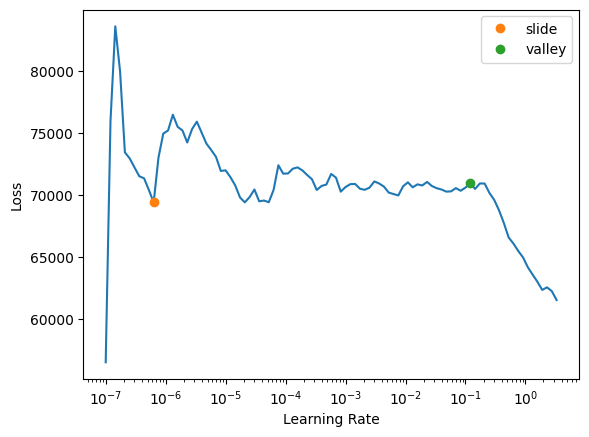

In [ ]:
learn.lr_find(suggest_funcs=(slide, valley))


In [ ]:
lr =1e-3

In [ ]:
learn.fit(20, lr=lr)


epoch,train_loss,valid_loss,_rmse,time
0,66242.859375,67021.148438,258.884430,00:01
1,66271.890625,66202.242188,257.297974,00:01
2,67997.523438,65333.894531,255.604980,00:01
3,69669.085938,63900.105469,252.784729,00:01
4,65378.382812,62664.269531,250.328308,00:01
5,63545.726562,60668.652344,246.310089,00:01
6,61450.027344,59228.425781,243.368927,00:02
7,60961.570312,57179.535156,239.122421,00:01
8,56346.742188,55005.875000,234.533310,00:01
9,55213.406250,53265.488281,230.793182,00:01
